In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import timedelta
import datetime
import matplotlib.dates as mdates
from matplotlib.font_manager import FontProperties
#import seaborn as sns
import math

In [3]:
#富山県の感染症データはここにあります。
#url1 = "https://toyama-pref.box.com/shared/static/nxsc7v7cjy09usa89a1o4ju9gfld0za7.csv"
#url2 = "https://toyama-pref.box.com/shared/static/vaowrw2ql5st13j9bgqbceg8htryqdij.csv"
#日次で更新してくれている。まずはこれをpandasに読み込ませます。

In [2]:
#富山県の感染者データ読込み 陽性患者属性除く (url1)

df = pd.read_csv("https://toyama-pref.box.com/shared/static/nxsc7v7cjy09usa89a1o4ju9gfld0za7.csv",
                  index_col=0, parse_dates=True)


df.head(10)

,PCR検査数,抗原検査数,陰性人数,陽性人数,一般相談件数,受診・相談センター相談件数,退院者数,死亡者数,備考
年月日,,,,,,,,,
2020-02-27,24.0,NaN,24.0,0.0,1614.0,96.0,0,0,当日以前の分も含めて累計で表示
2020-02-28,0.0,NaN,0.0,0.0,144.0,8.0,0,0,NaN
2020-02-29,0.0,NaN,0.0,0.0,43.0,4.0,0,0,NaN
2020-03-01,1.0,NaN,1.0,0.0,29.0,4.0,0,0,NaN
2020-03-02,1.0,NaN,1.0,0.0,165.0,6.0,0,0,NaN
2020-03-03,2.0,NaN,2.0,0.0,129.0,8.0,0,0,NaN
2020-03-04,3.0,NaN,3.0,0.0,113.0,10.0,0,0,NaN
2020-03-05,3.0,NaN,3.0,0.0,90.0,6.0,0,0,NaN
2020-03-06,4.0,NaN,4.0,0.0,102.0,9.0,0,0,NaN


In [3]:
df.iloc[0]

PCR検査数                      24.0
抗原検査数                        NaN
陰性人数                        24.0
陽性人数                         0.0
一般相談件数                    1614.0
受診・相談センター相談件数               96.0
退院者数                           0
死亡者数                           0
備考               当日以前の分も含めて累計で表示
Name: 2020-02-27 00:00:00, dtype: object

In [6]:
clus = ["陽性人数", ]
df = df[clus]


In [7]:
df1 = df.iloc[:]
df1

,陽性人数
年月日,
2020-02-27,0.0
2020-02-28,0.0
2020-02-29,0.0
2020-03-01,0.0
2020-03-02,0.0
...,...
2022-07-04,249.0
2022-07-05,210.0
2022-07-06,201.0


<AxesSubplot:title={'center':'日別発生人数'}, xlabel='年月日'>

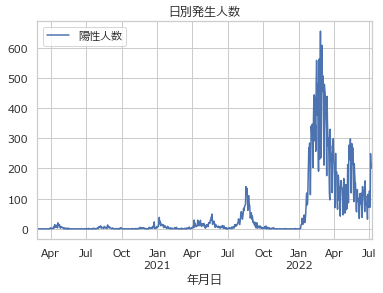

In [23]:
df1.plot(title="日別発生人数")

In [15]:
print(df1.resample('M').sum())
df2 = df1.resample("M").sum()

               陽性人数
年月日                
2020-02-29      0.0
2020-03-31      4.0
2020-04-30    196.0
2020-05-31     27.0
2020-06-30      0.0
2020-07-31     13.0
2020-08-31    149.0
2020-09-30     30.0
2020-10-31      4.0
2020-11-30     36.0
2020-12-31    102.0
2021-01-31    312.0
2021-02-28     33.0
2021-03-31     36.0
2021-04-30    394.0
2021-05-31    549.0
2021-06-30    157.0
2021-07-31    266.0
2021-08-31   2121.0
2021-09-30    365.0
2021-10-31     73.0
2021-11-30      1.0
2021-12-31      1.0
2022-01-31   2539.0
2022-02-28  10941.0
2022-03-31   9821.0
2022-04-30   4033.0
2022-05-31   5252.0
2022-06-30   2767.0
2022-07-31   1164.0


pandas.core.frame.DataFrame

<AxesSubplot:title={'center':'月別累計人数'}, xlabel='年月日'>

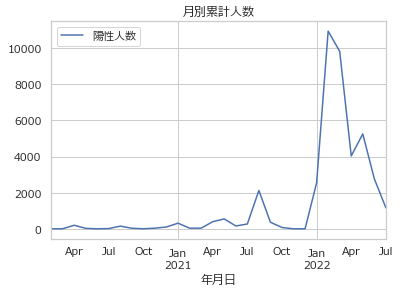

In [19]:
df2.plot(title="月別累計人数")

In [11]:
# 月中の最大値
print(df1.resample('M').max())    

             陽性人数
年月日              
2020-02-29    0.0
2020-03-31    3.0
2020-04-30   20.0
2020-05-31    5.0
2020-06-30    0.0
2020-07-31    2.0
2020-08-31   13.0
2020-09-30    5.0
2020-10-31    2.0
2020-11-30    5.0
2020-12-31   23.0
2021-01-31   38.0
2021-02-28    5.0
2021-03-31    6.0
2021-04-30   29.0
2021-05-31   49.0
2021-06-30   11.0
2021-07-31   33.0
2021-08-31  140.0
2021-09-30   43.0
2021-10-31    9.0
2021-11-30    1.0
2021-12-31    1.0
2022-01-31  284.0
2022-02-28  655.0
2022-03-31  608.0
2022-04-30  250.0
2022-05-31  298.0
2022-06-30  159.0
2022-07-31  249.0


               陽性人数
年月日                
2020-12-31    561.0
2021-12-31   4308.0
2022-12-31  36517.0


<AxesSubplot:xlabel='年月日'>

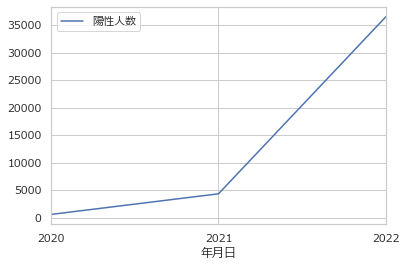

In [22]:
print(df1.resample('Y').sum())
(df1.resample('Y').sum()).plot()

In [13]:
print(df1.resample('W').sum())

             陽性人数
年月日              
2020-03-01    0.0
2020-03-08    0.0
2020-03-15    0.0
2020-03-22    0.0
2020-03-29    0.0
...           ...
2022-06-12  616.0
2022-06-19  765.0
2022-06-26  631.0
2022-07-03  659.0
2022-07-10  873.0

[124 rows x 1 columns]


In [14]:
print(df1.resample('M').agg(['sum', 'mean', 'max', 'min']))

               陽性人数                          
                sum        mean    max    min
年月日                                          
2020-02-29      0.0    0.000000    0.0    0.0
2020-03-31      4.0    0.129032    3.0    0.0
2020-04-30    196.0    6.533333   20.0    0.0
2020-05-31     27.0    0.870968    5.0    0.0
2020-06-30      0.0    0.000000    0.0    0.0
2020-07-31     13.0    0.419355    2.0    0.0
2020-08-31    149.0    4.806452   13.0    1.0
2020-09-30     30.0    1.000000    5.0    0.0
2020-10-31      4.0    0.129032    2.0    0.0
2020-11-30     36.0    1.200000    5.0    0.0
2020-12-31    102.0    3.290323   23.0    0.0
2021-01-31    312.0   10.064516   38.0    1.0
2021-02-28     33.0    1.178571    5.0    0.0
2021-03-31     36.0    1.161290    6.0    0.0
2021-04-30    394.0   13.133333   29.0    2.0
2021-05-31    549.0   17.709677   49.0    2.0
2021-06-30    157.0    5.233333   11.0    0.0
2021-07-31    266.0    8.580645   33.0    0.0
2021-08-31   2121.0   68.419355  1